<a href="https://colab.research.google.com/github/umesh2908/Machine-learning-projects/blob/master/MINST_fashion_Image_Recognition_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras 
import seaborn as sns

In [0]:
mnist = tf.keras.datasets.fashion_mnist

In [0]:
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

9
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 232 233 229 223 

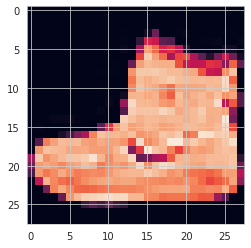

In [82]:
np.set_printoptions(linewidth=200)
import matplotlib.pyplot as plt
plt.imshow(training_images[0])
print(training_labels[0])
print(training_images[0])

In [83]:
training_images  = training_images / 255.0
test_images = test_images / 255.0
training_images.shape, test_images.shape

((60000, 28, 28), (10000, 28, 28))

In [0]:
import random
np.random.seed(1)
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(512, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

In [0]:
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('loss')<0.01):
      print("\nReached 90% accuracy so cancelling training!")
      self.model.stop_training = True
callbacks = myCallback()      

In [90]:
history=model.fit(training_images, training_labels, epochs=100,batch_size=32,validation_split=0.1,callbacks=[callbacks])

Epoch 1/100
1688/1688 [==============================] - 7s 4ms/step - loss: 0.4804 - accuracy: 0.8295 - val_loss: 0.3822 - val_accuracy: 0.8645
Epoch 2/100
1688/1688 [==============================] - 7s 4ms/step - loss: 0.3621 - accuracy: 0.8669 - val_loss: 0.3915 - val_accuracy: 0.8578
Epoch 3/100
1688/1688 [==============================] - 6s 4ms/step - loss: 0.3248 - accuracy: 0.8805 - val_loss: 0.3325 - val_accuracy: 0.8777
Epoch 4/100
1688/1688 [==============================] - 6s 4ms/step - loss: 0.2991 - accuracy: 0.8894 - val_loss: 0.3371 - val_accuracy: 0.8738
Epoch 5/100
1688/1688 [==============================] - 6s 4ms/step - loss: 0.2830 - accuracy: 0.8949 - val_loss: 0.3467 - val_accuracy: 0.8807
Epoch 6/100
1688/1688 [==============================] - 6s 4ms/step - loss: 0.2670 - accuracy: 0.9005 - val_loss: 0.3139 - val_accuracy: 0.8850
Epoch 7/100
1688/1688 [==============================] - 6s 4ms/step - loss: 0.2540 - accuracy: 0.9053 - val_loss: 0.3153 - val_ac

Text(0.5, 0, 'number of epochs')

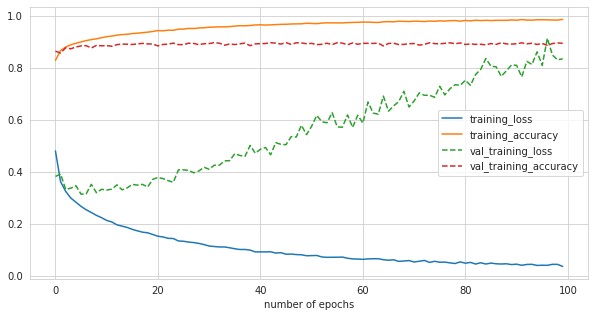

In [91]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'],label='training_loss')
plt.plot(history.history['accuracy'],label='training_accuracy')
plt.plot(history.history['val_loss'],label='val_training_loss',linestyle='dashed')
plt.plot(history.history['val_accuracy'],label='val_training_accuracy',linestyle='dashed')
plt.legend()
plt.xlabel('number of epochs')

In [92]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.8988 - accuracy: 0.8941


[0.8987847566604614, 0.89410001039505]

In [93]:
classifications = model.predict(test_images)

print(classifications[0])

[3.8398281e-32 4.3196600e-38 1.8543784e-31 8.0907222e-29 0.0000000e+00 1.9581368e-11 1.0590042e-27 2.9882760e-14 5.4895200e-34 1.0000000e+00]


In [94]:
print(test_labels[0])


9


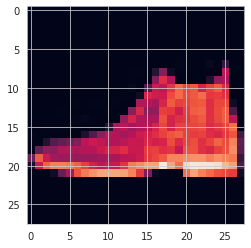

In [96]:
plt.imshow(test_images[0])

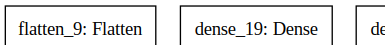

<Figure size 360x360 with 0 Axes>

In [99]:
import pydot
plt.figure(figsize=(5,5))
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
plot_model(model, to_file='model.png')
SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [100]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_9 (Flatten)          multiple                  0         
_________________________________________________________________
dense_19 (Dense)             multiple                  401920    
_________________________________________________________________
dense_20 (Dense)             multiple                  5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________
